In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pickle
%matplotlib inline

In [7]:
cluster=pd.read_csv('to_cluster.csv',index_col=0)

In [8]:
cluster

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.2700,0.853,114.941
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.3110,0.662,173.930
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.3350,0.722,108.966
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.0546,0.139,108.296
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.2830,0.181,129.953
...,...,...,...,...,...,...,...,...,...
2535,0.925,0.355,0,-9.309,0.5500,0.0413,0.1410,0.383,92.988
2536,0.827,0.702,6,-7.264,0.2670,0.2260,0.1580,0.694,130.020
2537,0.615,0.648,5,-3.792,0.2200,0.0411,0.2770,0.260,169.912
2538,0.916,0.571,10,-8.241,0.2000,0.0173,0.1530,0.498,103.521


In [13]:
X=cluster.copy()

In [16]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "scaler.pickle" # Path with filename
with open(filename, "wb") as file:
        pickle.dump(scaler,file)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.2700,0.853,114.941
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.3110,0.662,173.930
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.3350,0.722,108.966
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.0546,0.139,108.296
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.2830,0.181,129.953


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.111514,1.529946,-1.139763,0.572359,-0.453824,-0.651390,0.671505,1.702424,-0.259286
1,-0.975937,0.607235,0.237889,0.471542,-0.666165,0.527677,0.979480,0.845690,1.691928
2,1.081754,0.678213,1.340011,0.144395,-0.588017,-0.477328,1.159758,1.114821,-0.456925
3,-0.292211,-0.563898,1.340011,-1.749473,-0.635379,1.841437,-0.946491,-1.500233,-0.479087
4,0.313376,-0.989765,-0.313172,-0.319430,-0.476716,-0.607875,0.769156,-1.311842,0.237275


In [17]:
X_scaled_df.describe()

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
count,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03,2.540000e+03
mean,3.477533e-16,-2.262626e-16,5.983840e-17,3.976696e-16,2.399655e-17,-1.337513e-17,-1.454654e-16,2.980993e-17,-4.597372e-16
std,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00,1.000197e+00
min,-4.362011e+00,-3.708924e+00,-1.415293e+00,-1.082367e+01,-1.105844e+00,-8.896827e-01,-1.193623e+00,-2.123720e+00,-4.061258e+00
25%,-6.568647e-01,-6.112168e-01,-1.139763e+00,-3.854011e-01,-7.642441e-01,-7.583148e-01,-6.054652e-01,-7.870367e-01,-8.524667e-01
50%,7.569930e-02,5.715726e-02,-3.764136e-02,1.665543e-01,-4.676382e-01,-3.944407e-01,-4.026523e-01,-3.347034e-02,-2.331066e-02
75%,7.301231e-01,7.255314e-01,7.889498e-01,6.096579e-01,5.676210e-01,4.043830e-01,3.034372e-01,7.380381e-01,7.146421e-01
max,2.025947e+00,2.174661e+00,1.615541e+00,2.005447e+00,4.743390e+00,3.233939e+00,5.508969e+00,2.231714e+00,2.801549e+00


In [18]:
aglo = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
#aglo.fit(X_scaled_df)
agglo = aglo.fit_predict(X_scaled_df)
agglo

array([2539, 2538, 1875, ...,    4,    1,    0], dtype=int64)

In [35]:
agglo_cluster=AgglomerativeClustering(distance_threshold=30,n_clusters=None).fit(X_scaled_df)

In [36]:
agglo_cluster.labels_

array([7, 1, 1, ..., 0, 4, 4], dtype=int64)

In [37]:
group=(agglo_cluster.labels_).tolist()

In [38]:
num_values = len(set(group))
print(num_values)

8


In [39]:
X['agglo']=group

In [40]:
X

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,agglo
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.2700,0.853,114.941,7
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.3110,0.662,173.930,1
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.3350,0.722,108.966,1
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.0546,0.139,108.296,2
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.2830,0.181,129.953,0
...,...,...,...,...,...,...,...,...,...,...
2535,0.925,0.355,0,-9.309,0.5500,0.0413,0.1410,0.383,92.988,0
2536,0.827,0.702,6,-7.264,0.2670,0.2260,0.1580,0.694,130.020,5
2537,0.615,0.648,5,-3.792,0.2200,0.0411,0.2770,0.260,169.912,0
2538,0.916,0.571,10,-8.241,0.2000,0.0173,0.1530,0.498,103.521,4


In [42]:
X[X['agglo']==1]

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo,agglo
1,0.520,0.731,6,-5.338,0.0557,0.34200,0.3110,0.662,173.930,1
2,0.836,0.743,10,-6.305,0.0656,0.09950,0.3350,0.722,108.966,1
7,0.768,0.714,10,-5.110,0.0401,0.35200,0.1500,0.842,131.443,1
11,0.714,0.728,10,-4.595,0.0468,0.29800,0.1060,0.901,114.996,1
16,0.505,0.657,11,-5.240,0.0318,0.37300,0.1260,0.252,196.000,1
...,...,...,...,...,...,...,...,...,...,...
2494,0.648,0.827,9,-4.780,0.0420,0.00533,0.2170,0.598,176.005,1
2497,0.711,0.807,7,-5.052,0.0608,0.05200,0.2140,0.698,116.971,1
2499,0.482,0.823,9,-4.446,0.0661,0.03860,0.0948,0.451,167.665,1
2517,0.626,0.717,8,-5.751,0.0375,0.01700,0.2610,0.560,105.039,1


In [19]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

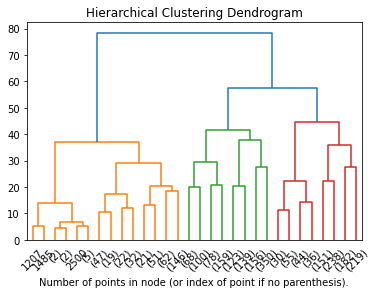

In [20]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(aglo, truncate_mode="level", p=4)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [43]:
X['agglo'].value_counts()

4    506
0    405
1    401
2    400
7    389
5    262
3    165
6     12
Name: agglo, dtype: int64

In [44]:
all=pd.read_csv('all.csv',index_col=0)

In [45]:
all

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop
0,Break My Soul,Beyonce,0.687,0.887,1,-5.040,0,0.0826,0.0575,0.000002,0.2700,0.853,114.941,audio_features,spotify:track:2KukL7UlQ8TdvpaA7bY3ZJ,https://api.spotify.com/v1/tracks/2KukL7UlQ8Td...,https://api.spotify.com/v1/audio-analysis/2Kuk...,278282,4,1
1,As It Was,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,1
2,About Damn Time,Lizzo,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,1
3,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,10,-11.903,0,0.0596,0.6590,0.002660,0.0546,0.139,108.296,audio_features,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4,1
4,Staying Alive,DJ Khaled Featuring Drake & Lil Baby,0.718,0.461,4,-7.676,0,0.0797,0.0680,0.000000,0.2830,0.181,129.953,audio_features,spotify:track:0g2Bbgy7P41pFjMWJuzsf4,https://api.spotify.com/v1/tracks/0g2Bbgy7P41p...,https://api.spotify.com/v1/audio-analysis/0g2B...,178176,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Why You Always Hatin?,YG Featuring Drake & Kamaiyah,0.925,0.355,0,-9.309,0,0.5500,0.0413,0.000000,0.1410,0.383,92.988,audio_features,spotify:track:4ezAjoV01phDz1SqO6SzEU,https://api.spotify.com/v1/tracks/4ezAjoV01phD...,https://api.spotify.com/v1/audio-analysis/4ezA...,196587,4,0
2536,CRZY,Kehlani,0.827,0.702,6,-7.264,1,0.2670,0.2260,0.000050,0.1580,0.694,130.020,audio_features,spotify:track:6Dwtha2FtZFoMEBh5GR2sq,https://api.spotify.com/v1/tracks/6Dwtha2FtZFo...,https://api.spotify.com/v1/audio-analysis/6Dwt...,191720,4,0
2537,Lockjaw,French Montana Featuring Kodak Black,0.615,0.648,5,-3.792,0,0.2200,0.0411,0.000000,0.2770,0.260,169.912,audio_features,spotify:track:7iaw359G2XT14uTfV9feip,https://api.spotify.com/v1/tracks/7iaw359G2XT1...,https://api.spotify.com/v1/audio-analysis/7iaw...,223147,4,0
2538,For Free,DJ Khaled Featuring Drake,0.916,0.571,10,-8.241,0,0.2000,0.0173,0.000001,0.1530,0.498,103.521,audio_features,spotify:track:5TqBAOIBe0bQA0spNdcG3k,https://api.spotify.com/v1/tracks/5TqBAOIBe0bQ...,https://api.spotify.com/v1/audio-analysis/5TqB...,183695,4,0


In [46]:
all['agglo']=group

In [50]:
all[all['agglo']==0].head(20)

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop,agglo
4,Staying Alive,DJ Khaled Featuring Drake & Lil Baby,0.718,0.461,4,-7.676,0,0.0797,0.06800,0.000000,...,0.1810,129.953,audio_features,spotify:track:0g2Bbgy7P41pFjMWJuzsf4,https://api.spotify.com/v1/tracks/0g2Bbgy7P41p...,https://api.spotify.com/v1/audio-analysis/0g2B...,178176,4,1,0
6,Wait For U,Future Featuring Drake & Tems,0.463,0.642,1,-4.474,1,0.3400,0.31400,0.000000,...,0.3390,83.389,audio_features,spotify:track:59nOXPmaKlBfGMDeOVGrIK,https://api.spotify.com/v1/tracks/59nOXPmaKlBf...,https://api.spotify.com/v1/audio-analysis/59nO...,189893,4,1,0
19,Stay,The Kid LAROI & Justin Bieber,0.718,0.461,4,-7.676,0,0.0797,0.06800,0.000000,...,0.1810,129.953,audio_features,spotify:track:0g2Bbgy7P41pFjMWJuzsf4,https://api.spotify.com/v1/tracks/0g2Bbgy7P41p...,https://api.spotify.com/v1/audio-analysis/0g2B...,178176,4,1,0
35,Sticky,Drake,0.853,0.495,6,-14.630,1,0.1400,0.09170,0.000217,...,0.0774,137.027,audio_features,spotify:track:4rmVZajAF7PkrCagGPHbqa,https://api.spotify.com/v1/tracks/4rmVZajAF7Pk...,https://api.spotify.com/v1/audio-analysis/4rmV...,243228,4,1,0
43,Super Gremlin,Kodak Black,0.825,0.414,2,-6.634,1,0.1440,0.00265,0.000000,...,0.1060,72.993,audio_features,spotify:track:4A8cWXxKfIL3lAyUDzXbCF,https://api.spotify.com/v1/tracks/4A8cWXxKfIL3...,https://api.spotify.com/v1/audio-analysis/4A8c...,200548,4,1,0
48,F.N.F. (Let's Go),Hitkidd & GloRilla,0.864,0.476,1,-10.068,1,0.4360,0.03740,0.000000,...,0.6470,157.144,audio_features,spotify:track:1vrFJDrysqmsNAgyjBzx4f,https://api.spotify.com/v1/tracks/1vrFJDrysqms...,https://api.spotify.com/v1/audio-analysis/1vrF...,137580,4,1,0
56,Sleazy Flow,SleazyWorld Go Featuring Lil Baby,0.869,0.298,2,-12.076,1,0.3860,0.20000,0.000000,...,0.1780,77.470,audio_features,spotify:track:5cx7vkF8BQ0iOsVpfvZbnz,https://api.spotify.com/v1/tracks/5cx7vkF8BQ0i...,https://api.spotify.com/v1/audio-analysis/5cx7...,161355,4,1,0
58,So Good,Halsey,0.576,0.627,3,-4.649,0,0.0449,0.03850,0.000000,...,0.3110,164.998,audio_features,spotify:track:6kxaaIeowajN7w21PfMLbu,https://api.spotify.com/v1/tracks/6kxaaIeowajN...,https://api.spotify.com/v1/audio-analysis/6kxa...,176059,4,1,0
66,Church Girl,Beyonce,0.792,0.919,2,-5.688,1,0.2760,0.03810,0.000005,...,0.2200,92.028,audio_features,spotify:track:2mqTtvbKxH7SoEQ2oGAnsA,https://api.spotify.com/v1/tracks/2mqTtvbKxH7S...,https://api.spotify.com/v1/audio-analysis/2mqT...,224473,4,1,0
67,Free Dem 5's,YoungBoy Never Broke Again,0.762,0.650,0,-6.018,1,0.3600,0.28300,0.000000,...,0.5030,79.488,audio_features,spotify:track:7gGxciSaKoeDJIC7dcaVFC,https://api.spotify.com/v1/tracks/7gGxciSaKoeD...,https://api.spotify.com/v1/audio-analysis/7gGx...,169057,4,1,0


In [51]:
all

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop,agglo
0,Break My Soul,Beyonce,0.687,0.887,1,-5.040,0,0.0826,0.0575,0.000002,...,0.853,114.941,audio_features,spotify:track:2KukL7UlQ8TdvpaA7bY3ZJ,https://api.spotify.com/v1/tracks/2KukL7UlQ8Td...,https://api.spotify.com/v1/audio-analysis/2Kuk...,278282,4,1,7
1,As It Was,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,...,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,1,1
2,About Damn Time,Lizzo,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,...,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,1,1
3,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,10,-11.903,0,0.0596,0.6590,0.002660,...,0.139,108.296,audio_features,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4,1,2
4,Staying Alive,DJ Khaled Featuring Drake & Lil Baby,0.718,0.461,4,-7.676,0,0.0797,0.0680,0.000000,...,0.181,129.953,audio_features,spotify:track:0g2Bbgy7P41pFjMWJuzsf4,https://api.spotify.com/v1/tracks/0g2Bbgy7P41p...,https://api.spotify.com/v1/audio-analysis/0g2B...,178176,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,Why You Always Hatin?,YG Featuring Drake & Kamaiyah,0.925,0.355,0,-9.309,0,0.5500,0.0413,0.000000,...,0.383,92.988,audio_features,spotify:track:4ezAjoV01phDz1SqO6SzEU,https://api.spotify.com/v1/tracks/4ezAjoV01phD...,https://api.spotify.com/v1/audio-analysis/4ezA...,196587,4,0,0
2536,CRZY,Kehlani,0.827,0.702,6,-7.264,1,0.2670,0.2260,0.000050,...,0.694,130.020,audio_features,spotify:track:6Dwtha2FtZFoMEBh5GR2sq,https://api.spotify.com/v1/tracks/6Dwtha2FtZFo...,https://api.spotify.com/v1/audio-analysis/6Dwt...,191720,4,0,5
2537,Lockjaw,French Montana Featuring Kodak Black,0.615,0.648,5,-3.792,0,0.2200,0.0411,0.000000,...,0.260,169.912,audio_features,spotify:track:7iaw359G2XT14uTfV9feip,https://api.spotify.com/v1/tracks/7iaw359G2XT1...,https://api.spotify.com/v1/audio-analysis/7iaw...,223147,4,0,0
2538,For Free,DJ Khaled Featuring Drake,0.916,0.571,10,-8.241,0,0.2000,0.0173,0.000001,...,0.498,103.521,audio_features,spotify:track:5TqBAOIBe0bQA0spNdcG3k,https://api.spotify.com/v1/tracks/5TqBAOIBe0bQ...,https://api.spotify.com/v1/audio-analysis/5TqB...,183695,4,0,4


In [52]:
all.to_csv('agglo_clustering.csv')